# **Data** 📍

Within this section we will be importing the data, opening and reading it, and organizing the data into training and validation data.

In [21]:
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /tmp/cell_images.zip

--2021-11-12 09:28:23--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/tmp/cell_images.zip’

/tmp/cell_images.zi 100%[===================>] 337.08M  2.27MB/s    in 2m 31s  

2021-11-12 09:30:54 (2.23 MB/s) - ‘/tmp/cell_images.zip’ saved [353452851/353452851]



In [22]:
import os
import zipfile

local_zip = '/tmp/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [24]:
os.mkdir("/tmp/cell_images/train")
os.mkdir("/tmp/cell_images/valid")

FileExistsError: ignored

In [25]:
os.mkdir("/tmp/cell_images/train/Parasitized")
os.mkdir("/tmp/cell_images/train/Uninfected")

FileExistsError: ignored

In [26]:
import random
import shutil
source1 = '/tmp/cell_images/Parasitized'
dest1 = '/tmp/cell_images/train/Parasitized'
files = os.listdir(source1)
for fileName in random.sample(files, min(len(files), 10334)):
    path = os.path.join(source1, fileName)
    shutil.move(path, dest1)

Error: ignored

In [27]:
source2 = '/tmp/cell_images/Uninfected'
dest2 = '/tmp/cell_images/train/Uninfected'
files = os.listdir(source2)
for fileName in random.sample(files, min(len(files), 10334)):
    path = os.path.join(source2, fileName)
    shutil.move(path, dest2)

Error: ignored

In [28]:
parasite = '/tmp/cell_images/Parasitized'
uninfec = '/tmp/cell_images/Uninfected'
valid = '/tmp/cell_images/valid'
shutil.move(parasite,valid)
shutil.move(uninfec, valid)

Error: ignored

In [29]:
base_dir = '/tmp/cell_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')
validation_Parasitized_dir = os.path.join(validation_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(validation_dir, 'Uninfected')

In [30]:
train_Parasitized_fnames = os.listdir(train_Parasitized_dir)
print(train_Parasitized_fnames[:10])

train_Uninfected_fnames = os.listdir(train_Uninfected_dir)
train_Uninfected_fnames.sort()
print(train_Uninfected_fnames[:10])

['C129P90ThinF_IMG_20151004_134700_cell_23.png', 'C189P150ThinF_IMG_20151203_142224_cell_86.png', 'C116P77ThinF_IMG_20150930_171809_cell_70.png', 'C172P133ThinF_IMG_20151119_155343_cell_283.png', 'C39P4thinF_original_IMG_20150622_110352_cell_85.png', 'C70P31_ThinF_IMG_20150813_132732_cell_1.png', 'C174P135NThinF_IMG_20151127_135342_cell_229.png', 'C137P98ThinF_IMG_20151005_160918_cell_74.png', 'C184P145ThinF_IMG_20151203_103637_cell_167.png', 'C97P58ThinF_IMG_20150917_151437_cell_157.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png', 'C100P61ThinF_IMG_20150918_144348_cell_125.png', 'C100P61ThinF_IMG_20150918_144348_cell_131.png', 'C100P61ThinF_IMG_20150918_144348_cell_25.png', 'C100P61ThinF_IMG_20150918_144348_cell_40.png']


In [31]:
print('total training Parasitized images:', len(os.listdir(train_Parasitized_dir)))
print('total training Uninfected images:', len(os.listdir(train_Uninfected_dir)))
print('total validation Parasitized images:', len(os.listdir(validation_Parasitized_dir)))
print('total validation Uninfected images:', len(os.listdir(validation_Uninfected_dir)))

total training Parasitized images: 10334
total training Uninfected images: 10334
total validation Parasitized images: 3446
total validation Uninfected images: 3446


In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

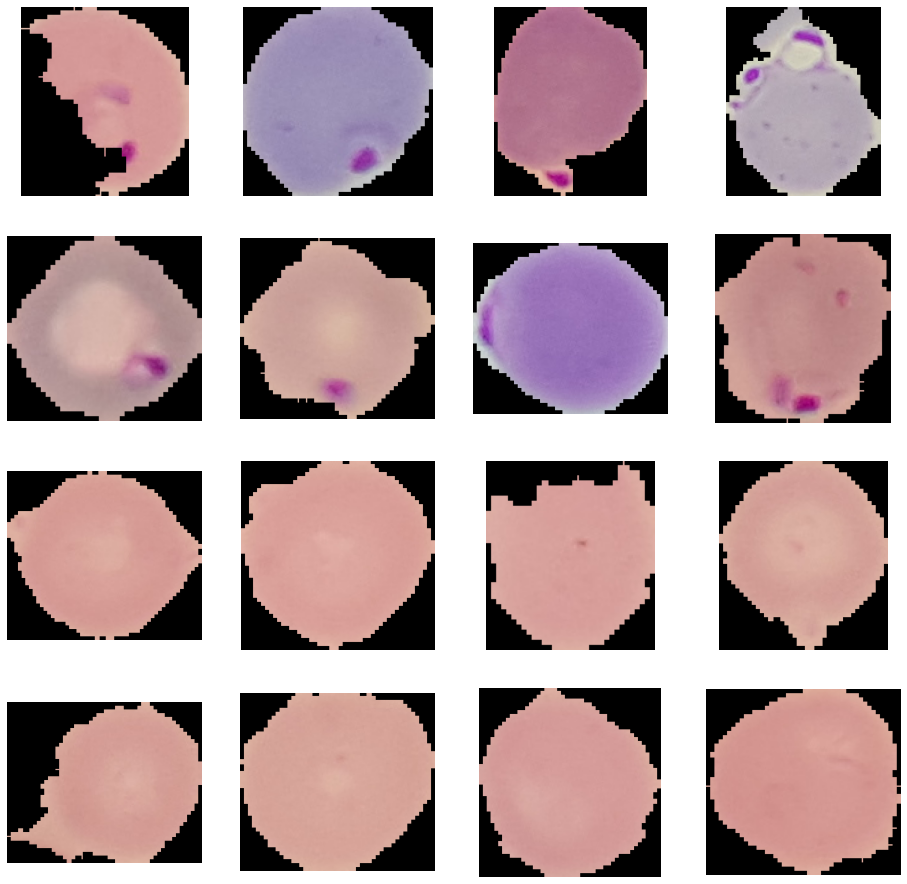

In [33]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Parasitized_pix = [os.path.join(train_Parasitized_dir, fname) 
                for fname in train_Parasitized_fnames[pic_index-8:pic_index]]
next_Uninfected_pix = [os.path.join(train_Uninfected_dir, fname) 
                for fname in train_Uninfected_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Parasitized_pix+next_Uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **Training the Model** 🏋️

In this section we will be importing the training algorithm and training our model.



In [34]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [1]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

NameError: ignored

In [36]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [38]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 20667 images belonging to 2 classes.
Found 6891 images belonging to 2 classes.


In [2]:
train_generator = train_datagen.flow_from_directory(
train_dir,  # This is the source directory for training images
target_size=(150, 150),  # All images will be resized to 150x150

batch_size=50,
class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=50,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=25,
epochs=10,
validation_data=validation_generator,
validation_steps=25,
verbose=2
)

NameError: ignored

# Results 📈

In this section we produce graphs and illustrations that demonstrate the capabilities of the model.

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, val_acc)
plt.title('Accuracy')

plt.figure()

plt.plot(epochs, val_loss)
plt.title('Loss')
print(val_acc)

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a parasitized cell or uninfected cell from the training set.
Parasitized_img_files = [os.path.join(train_Parasitized_dir, f) for f in train_Parasitized_fnames]
Uninfected_img_files = [os.path.join(train_Uninfected_dir, f) for f in train_Uninfected_fnames]
img_path = random.choice(Parasitized_img_files + Uninfected_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, val_acc)
plt.title('Accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, val_loss)
plt.title('Loss')

In [ ]:
model.save('keras.h5')